# Лабораторноая работа №8. Метод опорных векторов - Support Vector Machines 

## Подделка вина

Чаще всего вино подделывают, разбавляя его более дешёвыми продуктами (например, соком), а иногда и с помощью опасных химикатов или подсластителей (чтобы добавить цвет или вкус).

Другой тип подделки - продажа более дешёвых вин под более дорогими марками.

<img src="wine.jpg">

## Цели проекта

Компания-дистрибьютор вина недавно столкнулась с подделками. В итоге был проведён аудит различных вин с помощью химического анализа. Компания занимается экспортом очень качественных и дорогих вин, но один из поставщиков попытался передать дешёвое вино под видом более дорогого. Компания-дистрибьютор наняла Вас, чтобы Вы создали модель машинного обучения, которая предскажет низкое качество вина (то есть, "подделку"). Они хотят узнать, возможно ли определить разницу между дешёвыми и дорогими винами.


Источник данных: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**ЗАДАНИЕ: Обшая цель - используя данные ниже, разработайте модель машинного обучения, которая будет предсказывать на основе некоторых химических тестов, является ли вино настоящим или поддельным. Выполните задания ниже.**

---
---

Импортируйте библиотеки и загрузите данные

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv("data/wine_fraud.csv")

In [21]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


**ЗАДАНИЕ: Сколько различных значений находится в целевой колонке quality, значения которой мы будем предсказывать?**

In [15]:
unique_quality_values = data['quality'].nunique()
print(f"Количество различных значений в колонке 'quality': {unique_quality_values}")

Количество различных значений в колонке 'quality': 2


**ЗАДАНИЕ: Нарисуйте график countplot, отображающий количество для каждой из категорий - Legit и Fraud.**

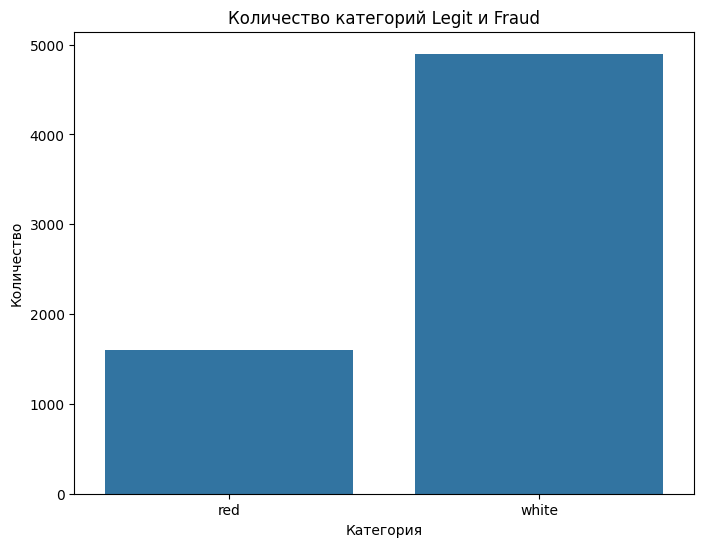

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=data)
plt.title("Количество категорий Legit и Fraud")
plt.xlabel("Категория")
plt.ylabel("Количество")
plt.show()

**ЗАДАНИЕ: Давайте выясним, есть ли разница в количестве подделок в зависимости от того, красное вино или белое. Нарисуйте график countplot, отображая *тип* вина по оси x, и разбивая значения Fraud и Legit с помощью параметра hue.**

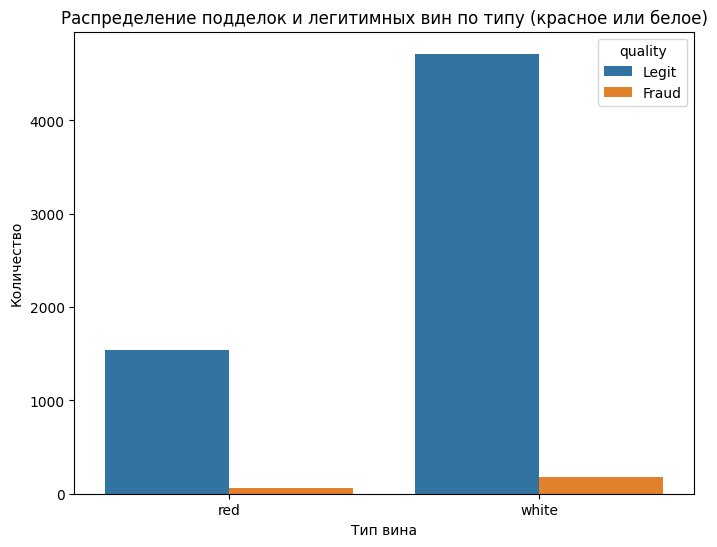

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='type', hue='quality', data=data)
plt.title("Распределение подделок и легитимных вин по типу (красное или белое)")
plt.xlabel("Тип вина")
plt.ylabel("Количество")
plt.show()

**ЗАДАНИЕ: Какой процент красных вин является подделкой? Какой процент белых вин является подделкой?**

In [22]:
categorical_columns = ['quality', 'type']
unique_values = {col: data[col].unique() for col in categorical_columns}

print(unique_values)

{'quality': array(['Legit', 'Fraud'], dtype=object), 'type': array(['red', 'white'], dtype=object)}


In [23]:
data['type'] = data['type'].map({'red': 0, 'white': 1})
data['quality'] = data['quality'].map({'Legit': 0, 'Fraud': 1})

In [29]:
red_wines = data[data['type'] == 0]
red_fraud_percentage = red_wines['quality'].mean() * 100
print(f"Процент поддельных красных вин: {red_fraud_percentage:.2f}%")

Процент поддельных красных вин: 3.94%


In [30]:
white_wines = data[data['type'] == 1]
white_fraud_percentage = red_wines['quality'].mean() * 100
print(f"Процент поддельных белых вин: {white_fraud_percentage:.2f}%")

Процент поддельных белых вин: 3.94%


**ЗАДАНИЕ: Вычислите корреляцию между различными признаками и колонкой "quality". Чтобы сделать это, Вам можете использовать значения 0 и 1 вместо текстовых значений Legit и Fraud.**

In [24]:
correlation_matrix = data.corr()
quality_correlation = correlation_matrix['quality'].drop('quality')
print("Корреляция с колонкой 'quality':")
print(quality_correlation)

Корреляция с колонкой 'quality':
fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
type                   -0.004598
Name: quality, dtype: float64


**ЗАДАНИЕ: Нарисуйте график bar plot, отобразив значения корреляции для поддельных вин.**

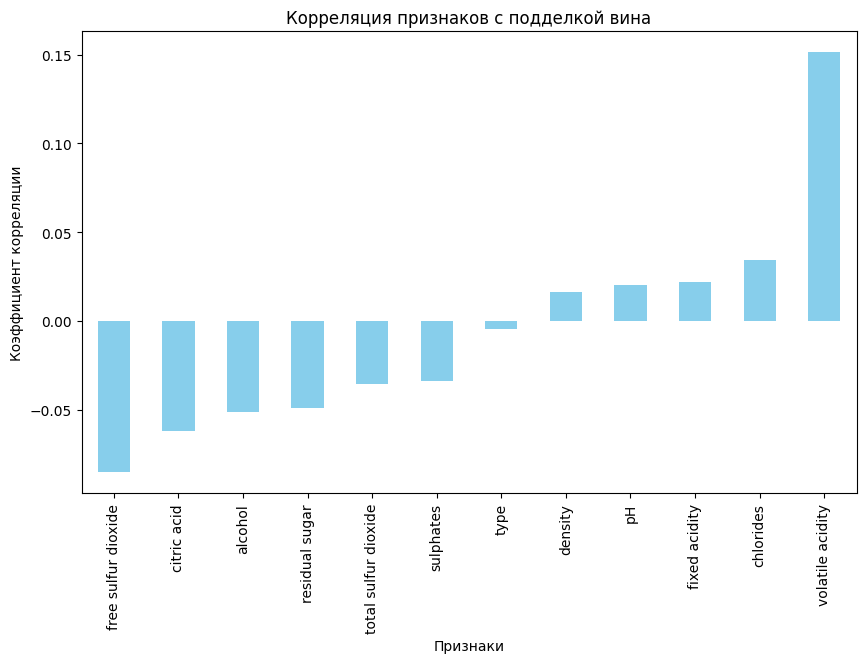

In [31]:

plt.figure(figsize=(10, 6))
quality_correlation.sort_values().plot(kind='bar', color='skyblue')
plt.title("Корреляция признаков с подделкой вина")
plt.xlabel("Признаки")
plt.ylabel("Коэффициент корреляции")
plt.show()

----
## Модель машинного обучения

**ЗАДАНИЕ: Сконвертируйте категориальную колонку "type" из текстовых значений "red" и "white" в dummy-переменные:**

In [ ]:
# Данные уже переведенны 

**ЗАДАНИЕ: Разделите данные на признаки X и целевую переменную y (колонка "quality")**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = data.drop('quality', axis=1)
y = data['quality']

**ЗАДАНИЕ: Разбейте данные на обучающий и тестовый набор данных, в отношении 90% и 10%. Замечание - в решении мы используем random state = 101**

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**ЗАДАНИЕ: Смасштабируйте данные в наборах X train и X test.**

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
X_train = scaler.fit_transform(X_train)

In [38]:
X_test = scaler.transform(X_test)

**ЗАДАНИЕ: Создайте экземпляр классификатора Support Vector Machine. Поскольку классы несбалансированы,  можем автоматически подобрать веса обратно пропорционально тому, как часто встречаются классы во входных переменных, используя параметр в вызове метода SVC(). Выясните в онлайн-документации по SVC, что это за параметр.**

In [39]:

from sklearn.svm import SVC

In [40]:
svc_model = SVC(class_weight='balanced', random_state=101)

Параметр `class_weight='balanced'` автоматически взвешивает классы так, чтобы компенсировать несбалансированность данных. В частности, SVM учитывает обратную пропорцию к частоте появления классов, что позволяет лучше предсказывать менее распространённые классы, избегая перекоса в сторону более частых классов.

In [41]:
svc_model.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=101)

**ЗАДАНИЕ: С помощью GridSearchCV выполните поиск по сетке значений параметров C и gamma.**

In [43]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001]}

grid = GridSearchCV(SVC(class_weight='balanced', random_state=101), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Вывод наилучших параметров
print("Наилучшие параметры:", grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   3.2s
[CV] END .....................................C=0.1, gamma=1; total time=   2.6s
[CV] END .....................................C=0.1, gamma=1; total time=   2.9s
[CV] END .....................................C=0.1, gamma=1; total time=   2.7s
[CV] END .....................................C=0.1, gamma=1; total time=   2.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.4s
[CV] END ..................................C=0.1, gamma=0.01; total time=   1.8s
[CV] END ..................................C=0.1

In [46]:
y_pred = grid.predict(X_test)

**ЗАДАНИЕ: Отобразите матрицу "confusion matrix" и отчёт "classification report" для Вашей модели.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))

Матрица ошибок:
[[620   3]
 [ 24   3]]


In [48]:
print("Отчёт классификации:")
print(classification_report(y_test, y_pred))

Отчёт классификации:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       623
           1       0.50      0.11      0.18        27

    accuracy                           0.96       650
   macro avg       0.73      0.55      0.58       650
weighted avg       0.94      0.96      0.95       650



**ЗАДАНИЕ: Как Вы думаете, насколько хорошо работает модель? Можно ли рекомендовать её к применению? Будет ли она работать в реальной жизни?**

Модель показывает высокую точность в классификации настоящего вина (класс **0**), но её способность выявлять поддельное вино (класс **1**) остается очень низкой. Это свидетельствует о сильном дисбалансе в данных, где настоящий класс доминирует, что позволяет модели достигать высокого показателя общей точности, но неэффективно распознавать подделки. В реальной жизни такая модель будет непригодна для целей контроля подделок, поскольку:

1. Недостаток выявления подделок: Низкие показатели `recall` и `f1-score` для класса **1** означают, что модель пропускает большинство поддельных вин, что в практическом применении критично. В реальной задаче классификации, связанной с качеством или подлинностью продуктов, крайне важны высокие показатели выявления подделок, так как даже небольшое количество пропущенных подделок может снизить доверие к системе.

2. Несбалансированные данные: Так как модель обучена на выборке с очень малым числом поддельных вин, она «приспособилась» к распознаванию только большинства. Для реального применения модели было бы необходимо:

    - Увеличить представительность поддельных вин в обучающей выборке, либо путем сбора дополнительных данных, либо с помощью методов *oversampling* (например, `SMOTE`).
    - Применить методы, способные эффективно работать с несбалансированными данными (например, ансамблевые модели или настройка порогов принятия решения).
3. Точность по отношению к значимости задачи: В реальных условиях модель с такой высокой долей ошибок для класса подделок не удовлетворит требования безопасности и контроля качества. Она даст слишком много ложных уверений в подлинности вина, что недопустимо для задачи обнаружения подделок.

In [49]:
svc = SVC(class_weight='balanced')  # автоматическое определение весов классов

param_grid = {'C': [0.1, 1, 10], 
              'gamma': [0.1, 1, 10]}
grid = GridSearchCV(svc, param_grid, refit=True)
grid.fit(X_train, y_train)

# Вывод результатов
y_pred = grid.predict(X_test)
print("Наилучшие параметры:", grid.best_params_)
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))
print("Отчёт классификации:")
print(classification_report(y_test, y_pred))

Наилучшие параметры: {'C': 0.1, 'gamma': 10}
Матрица ошибок:
[[623   0]
 [ 25   2]]
Отчёт классификации:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       623
           1       1.00      0.07      0.14        27

    accuracy                           0.96       650
   macro avg       0.98      0.54      0.56       650
weighted avg       0.96      0.96      0.95       650



В этом случае модель находит все объекты класса **0** и не ошибается, но сильно страдает на подделках. Полнота для класса **1** всё ещё очень низкая (**0.07**), что означает, что модель почти не находит подделки. Такой подход можно использовать в случаях, когда важно точно классифицировать легитимные объекты, но для реального использования в ситуациях, где важно обнаружить подделки, модель тоже не будет достаточно эффективной.

In [51]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=101)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

svc = SVC()
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
grid = GridSearchCV(svc, param_grid, refit=True)
grid.fit(X_train_smote, y_train_smote)

# Вывод результатов
y_pred = grid.predict(X_test)
print("Наилучшие параметры:", grid.best_params_)
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))
print("Отчёт классификации:")
print(classification_report(y_test, y_pred))

Наилучшие параметры: {'C': 10, 'gamma': 1}
Матрица ошибок:
[[615   8]
 [ 23   4]]
Отчёт классификации:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       623
           1       0.33      0.15      0.21        27

    accuracy                           0.95       650
   macro avg       0.65      0.57      0.59       650
weighted avg       0.94      0.95      0.94       650



В этой модели мы видим лучшее соотношение между `accuracy` и `recall` по сравнению с предыдущими моделями, но полнота для класса **1** всё ещё низкая (**0.15**), что не подходит для реального применения, где важна высокая полнота для обнаружения подделок.

In [52]:
from sklearn.metrics import precision_recall_curve

In [54]:
svc = SVC(C=10, gamma=1, probability=True)  # оптимальные параметры с предыдущих тестов
svc.fit(X_train, y_train)

y_scores = svc.predict_proba(X_test)[:, 1]

# Получаем значения precision, recall и thresholds для precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Находим точку с максимальным F1-скором (это сбалансированное сочетание precision и recall)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[f1_scores.argmax()]

# Применяем новый порог
y_pred_thresholded = (y_scores >= optimal_threshold).astype(int)

# Вывод результатов
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred_thresholded))
print("Отчёт классификации:")
print(classification_report(y_test, y_pred_thresholded))

Матрица ошибок:
[[592  31]
 [ 14  13]]
Отчёт классификации:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       623
           1       0.30      0.48      0.37        27

    accuracy                           0.93       650
   macro avg       0.64      0.72      0.66       650
weighted avg       0.95      0.93      0.94       650



В этом случае `полнота` для класса **1** (подделки) значительно улучшена (**0.48**), что делает модель более сбалансированной по сравнению с предыдущими подходами. Однако `точность` для подделок всё ещё не очень высокая (**0.30**), и модель теряет в общей `точности` (**0.93**). Тем не менее, это более эффективный подход для реальной жизни, так как он повышает вероятность обнаружения подделок, но требует дальнейшей настройки для улучшения точности.